In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats, LoadEntropy

In [13]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.legend_handler import HandlerTuple
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(18,16,14,14)

In [3]:
x, entropy = LoadEntropy(37, 74, 1e7, 1e5, 1j, 0.048, 'circle', 'cfl')

In [7]:
entropy

array([1.25331414, 1.53499006, 1.77245385, 1.98166365, 2.17080376,
       2.34473605, 2.50662827, 2.65868078, 2.80249561, 2.93928219,
       3.06998012, 3.19533662, 3.31595752, 3.43234212, 3.5449077 ,
       3.65400722, 3.75994241, 3.86297361, 3.9633273 , 4.06120197,
       4.15677274, 4.25019503, 4.34160753])

In [8]:
Ne = 37
Ns = 3*Ne
#non-thermal iterations
M0 = int(1e5)
M = int(5e6)

step = 0.049
t = 1j

In [12]:
boundaries = np.arange(0.0250, 0.3001, 0.0125)
ps = np.zeros((boundaries.size,2))
term = 'sign'
state = 'cfl3'
for i in range(boundaries.size):
    signs = np.loadtxt(f"../results/{state}/n_{Ne}/{term}/{state}_{term}_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.4f}_step_{step:.3f}.dat")
    ps[i] = signs[0,:]
np.savetxt(f"{state}_{term}_Ne_{Ne}_Ns_{Ns}_t_1.00_step_{step:.3f}_circles.dat", np.vstack((boundaries, ps.T)).T)

#Lxs = np.arange(10,91,10)
#Lys = 2*np.pi*Ns/Lxs
#rs = Lys/Lxs

In [62]:
kf = {12: 2.5, 21:5, 32: 8.5, 37:10, 69:20}
Lx = {12:12.279920495357862, 21:16.244807875181, 32: 20.053026197048002, 37: 21.56283174194172, 69:29.44621490770559 }

### Ne = 12

In [32]:
Ne = 12

p_cfl = np.loadtxt(f"cfl_p_Ne_12_Ns_24_t_1.00_step_0.087_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_12_Ns_24_t_1.00_step_0.087_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_12_Ns_24_t_1.00_step_0.087_circles.dat")
boundaries = p_cfl[:-7,0]
p_cfl_means = p_cfl[:-7,1]
p_cfl_vars = p_cfl[:-7,2]
mod_cfl_means = mod_cfl[:-7,1]
mod_cfl_vars = mod_cfl[:-7,2]
sign_cfl_means = sign_cfl[:-7,1]
sign_cfl_vars = sign_cfl[:-7,2]


p_ff = np.loadtxt(f"free_fermions_p_Ne_12_Ns_24_t_1.00_step_0.095_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_12_Ns_24_t_1.00_step_0.095_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_12_Ns_24_t_1.00_step_0.095_circles.dat")
p_ff_means = p_ff[:-7,1]
p_ff_vars = p_ff[:-7,2]
mod_ff_means = mod_ff[:-7,1]
mod_ff_vars = mod_ff[:-7,2]
sign_ff_means = sign_ff[:-7,1]
sign_ff_vars = sign_ff[:-7,2]

x = boundaries*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [33]:
S_mod_cfl = -np.log(p_cfl_means*mod_cfl_means)
err_mod_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2) + mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M-M0)

S_cfl = S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_mod_cfl**2 + err_sign_cfl**2)

S_mod_ff = -np.log(p_ff_means*mod_ff_means)
err_mod_ff = np.sqrt(p_ff_vars/(p_ff_means**2) + mod_ff_vars/(mod_ff_means**2))/np.sqrt(M-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M-M0)

S_ff = S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_mod_ff**2 + err_sign_ff**2)


In [34]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x), S_cfl/x, deg=1, cov=True)
popt_ff, pcov_ff = np.polyfit(np.log(x), S_ff/x, deg=1, cov=True)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]

popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x), S_sign_cfl/x, deg=1, cov=True)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x), S_sign_ff/x, deg=1, cov=True)

y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

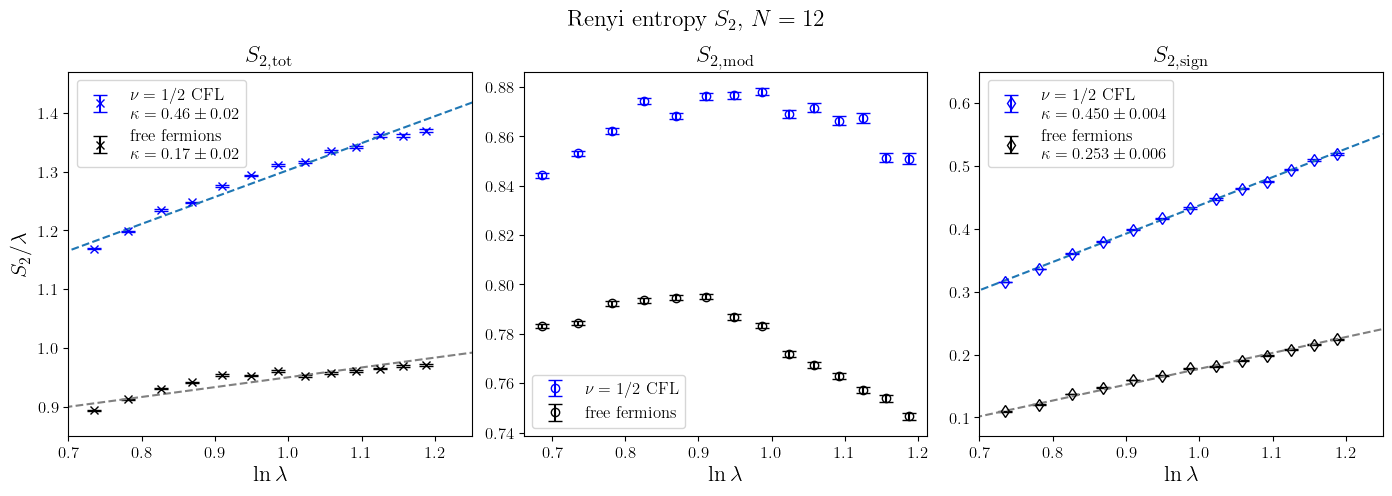

In [41]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle('Renyi entropy $S_{2}$, $N=12$ ')

ax[0].errorbar(np.log(x), (S_cfl/x), err_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.2f} \pm {np.sqrt(pcov_cfl[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x), (S_ff/x), err_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_ff, '--', c='gray')
ax[0].legend()
ax[0].set_ylabel('$S_{2}/\\lambda$')
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_xlim(0.7,1.25)
ax[0].set_ylim(0.85,1.47)
ax[0].set_title('$S_{2, \mathrm{tot}}$')

ax[1].errorbar(np.log(x), (S_mod_cfl/x), err_mod_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL')
ax[1].errorbar(np.log(x), (S_mod_ff/x), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')

ax[2].errorbar(np.log(x), (S_sign_cfl/x), err_sign_cfl, marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x), (S_sign_ff/x), err_sign_ff, marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.7,1.25)
ax[2].set_ylim(0.07,0.65)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

plt.savefig('cfl n=12.png', dpi=350)

### N = 21

In [57]:
Ne = 21

p_cfl = np.loadtxt(f"cfl_p_Ne_21_Ns_42_t_1.00_step_0.060_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_21_Ns_42_t_1.00_step_0.060_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_21_Ns_42_t_1.00_step_0.060_circles.dat")
p_cfl_means = p_cfl[:,1]
p_cfl_vars = p_cfl[:,2]
mod_cfl_means = mod_cfl[:,1]
mod_cfl_vars = mod_cfl[:,2]
sign_cfl_means = sign_cfl[:,1]
sign_cfl_vars = sign_cfl[:,2]


boundaries_cfl = p_cfl[:,0]
x_cfl = boundaries_cfl*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]


p_ff = np.loadtxt(f"free_fermions_p_Ne_21_Ns_42_t_1.00_step_0.070_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_21_Ns_42_t_1.00_step_0.070_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_21_Ns_42_t_1.00_step_0.070_circles.dat")
p_ff_means = p_ff[:,1]
p_ff_vars = p_ff[:,2]
mod_ff_means = mod_ff[:,1]
mod_ff_vars = mod_ff[:,2]
sign_ff_means = sign_ff[:,1]
sign_ff_vars = sign_ff[:,2]

boundaries_ff = p_ff[:,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]


In [58]:
boundaries_ff

array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   , 0.1125, 0.125 , 0.1375,
       0.15  , 0.1625, 0.175 , 0.1875, 0.2   , 0.2125, 0.225 , 0.2375,
       0.25  , 0.2625, 0.275 , 0.2875, 0.3   ])

In [50]:
S_m_ff = -np.log(mod_ff_means)
err_m_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M-M0)

S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M-M0)

In [51]:
S_m_cfl = -np.log(mod_cfl_means)
err_m_cfl = np.sqrt(mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M-M0)

S_p_cfl = -np.log(p_cfl_means)
err_p_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2))/np.sqrt(M-M0)

<ErrorbarContainer object of 3 artists>

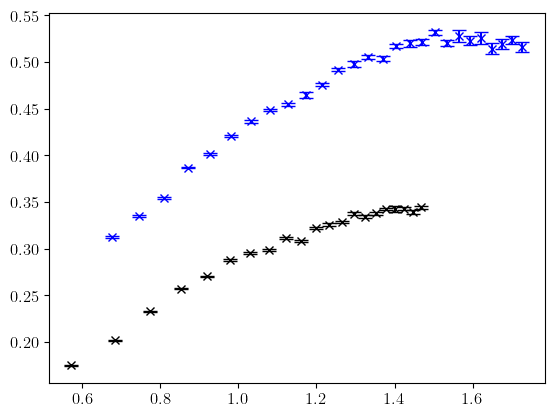

In [52]:
plt.errorbar(np.log(x_ff), (S_m_ff/x_ff), err_m_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
plt.errorbar(np.log(x_cfl), (S_m_cfl/x_cfl), err_m_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

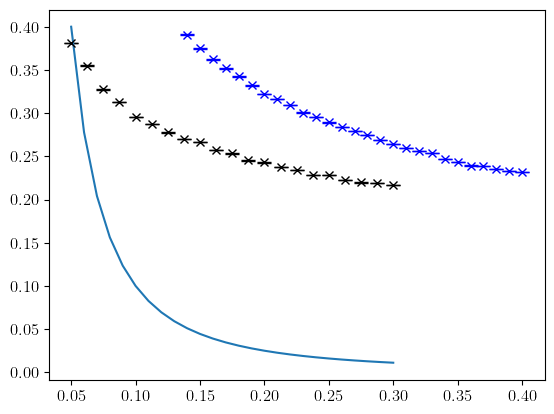

In [61]:
plt.errorbar(boundaries_ff, p_ff_means, np.sqrt(p_ff_vars/(M-M0)), marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
plt.errorbar(boundaries_cfl, p_cfl_means, np.sqrt(p_cfl_vars/(M-M0)), marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

x = np.arange(0.05, 0.31, 0.01)
y = 0.001/(x**2)
plt.plot(x,y)

<ErrorbarContainer object of 3 artists>

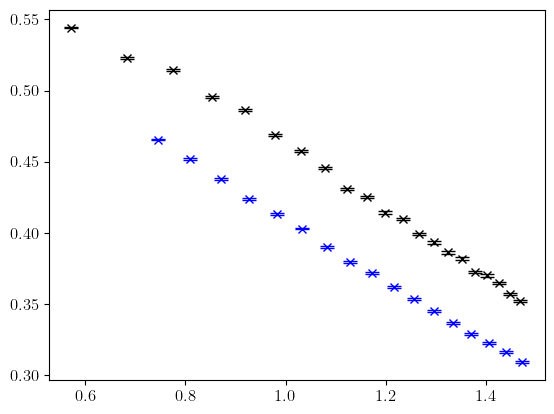

In [47]:
plt.errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
plt.errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

In [26]:
S_mod_cfl = -np.log(p_cfl_means*mod_cfl_means)
err_mod_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2) + mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M-M0)

S_cfl = S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_mod_cfl**2 + err_sign_cfl**2)

S_mod_ff = -np.log(p_ff_means*mod_ff_means)
err_mod_ff = np.sqrt(p_ff_vars/(p_ff_means**2) + mod_ff_vars/(mod_ff_means**2))/np.sqrt(M-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M-M0)

S_ff = S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_mod_ff**2 + err_sign_ff**2)


In [27]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x_cfl), S_cfl/x_cfl, deg=1, cov=True)
popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]

popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x_cfl), S_sign_cfl/x_cfl, deg=1, cov=True)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

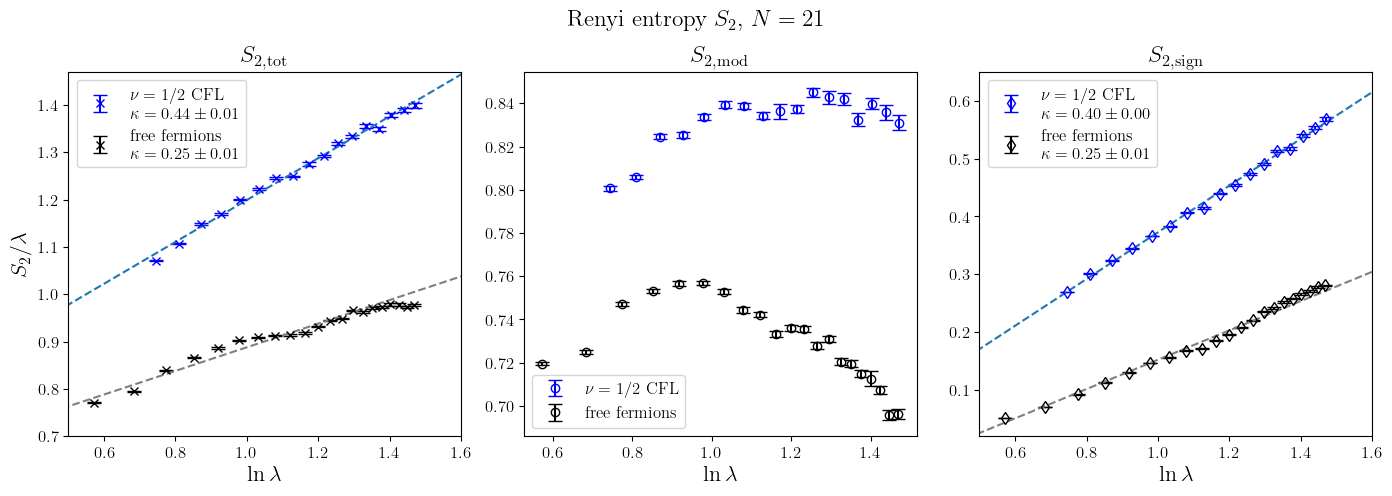

In [28]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle('Renyi entropy $S_{2}$, $N=21$ ')

ax[0].errorbar(np.log(x_cfl), (S_cfl/x_cfl), err_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.2f} \pm {np.sqrt(pcov_cfl[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_cfl, '--', c='tab:blue')
#ax[0].plot(x_fit, x_fit*0.5 + popt_cfl[1]-0.06, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (S_ff/x_ff), err_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_ff, '--', c='gray')
ax[0].legend()
ax[0].set_ylabel('$S_{2}/\\lambda$')
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_xlim(0.5,1.6)
ax[0].set_ylim(0.7,1.47)
ax[0].set_title('$S_{2, \mathrm{tot}}$')

ax[1].errorbar(np.log(x_cfl), (S_mod_cfl/x_cfl), err_mod_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL')
ax[1].errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')

ax[2].errorbar(np.log(x_cfl), (S_sign_cfl/x_cfl), err_sign_cfl, marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.2f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.2f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.2f} \pm {np.sqrt(pcov_sign_ff[0,0]):.2f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.5,1.6)
ax[2].set_ylim(0.02,0.65)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

#plt.savefig('cfl n=21.png', dpi=350) 

### N = 32

In [95]:
Ne = 32
M0 = int(1e5)

M_cfl = int(5e6)
M_ff = int(15e6)

p_cfl = np.loadtxt(f"cfl_p_Ne_32_Ns_64_t_1.00_step_0.050_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_32_Ns_64_t_1.00_step_0.050_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_32_Ns_64_t_1.00_step_0.050_circles.dat")
p_cfl_means = p_cfl[:,1]
p_cfl_vars = p_cfl[:,2]
mod_cfl_means = mod_cfl[:,1]
mod_cfl_vars = mod_cfl[:,2]
sign_cfl_means = sign_cfl[:,1]
sign_cfl_vars = sign_cfl[:,2]

boundaries_cfl = p_cfl[:,0]
x_cfl =  np.sqrt(boundaries_cfl/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

p_ff = np.loadtxt(f"free_fermions_p_Ne_32_Ns_64_t_1.00_step_0.055_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_32_Ns_64_t_1.00_step_0.055_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_32_Ns_64_t_1.00_step_0.055_circles.dat")
p_ff_means = p_ff[:,1]
p_ff_vars = p_ff[:,2]
mod_ff_means = mod_ff[:,1]
mod_ff_vars = mod_ff[:,2]
sign_ff_means = sign_ff[:,1]
sign_ff_vars = sign_ff[:,2]

boundaries_ff = p_ff[:,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [3]:
x_cfl, entropy_cfl = LoadEntropy(32, 64, 5e6, 1e5, 1j, 0.050, 'circle', 'cfl')
x_ff, entropy_ff = LoadEntropy(32, 64, 15e6, 1e5, 1j, 0.055, 'circle', 'free_fermions')

popt_cfl, pcov_cfl = np.polyfit(np.log(x_cfl), entropy_cfl[:,6]/x_cfl, deg=1, cov=True, w=1/entropy_cfl[:,7])
popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x_cfl), entropy_cfl[:,4]/x_cfl, deg=1, cov=True, w=1/entropy_cfl[:,5])

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]

popt_ff, pcov_ff = np.polyfit(np.log(x_ff), entropy_ff[:,6]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,7])
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), entropy_ff[:,4]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,5])

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

In [96]:
S_p_cfl = -np.log(p_cfl_means)
err_p_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2))/np.sqrt(M_cfl-M0)

S_mod_cfl = -np.log(mod_cfl_means)
err_mod_cfl = np.sqrt(mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M_cfl-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M_cfl-M0)

S_cfl = S_p_cfl + S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_p_cfl**2 + err_mod_cfl**2 + err_sign_cfl**2)

S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M_ff-M0)

S_mod_ff = -np.log(mod_ff_means)
err_mod_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M_ff-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M_ff-M0)

S_ff = S_p_ff + S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_p_ff**2 + err_mod_ff**2 + err_sign_ff**2)

In [97]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x_cfl), S_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)
popt_p_cfl, pcov_p_cfl = np.polyfit(np.log(x_cfl), S_p_cfl/x_cfl, deg=1, cov=True, w=1/err_p_cfl)
popt_mod_cfl, pcov_mod_cfl = np.polyfit(np.log(x_cfl), S_mod_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)
popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x_cfl), S_sign_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_p_cfl = x_fit*popt_p_cfl[0] + popt_p_cfl[1]
y_fit_mod_cfl = x_fit*popt_mod_cfl[0] + popt_mod_cfl[1]
y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]

popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_p_ff, pcov_p_ff = np.polyfit(np.log(x_ff), S_p_ff/x_ff, deg=1, cov=True, w=1/err_p_ff)
popt_mod_ff, pcov_mod_ff = np.polyfit(np.log(x_ff), S_mod_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_p_ff = x_fit*popt_p_ff[0] + popt_p_ff[1]
y_fit_mod_ff = x_fit*popt_mod_ff[0] + popt_mod_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


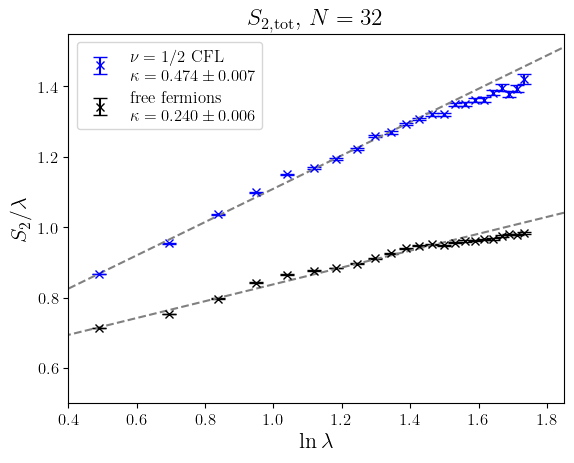

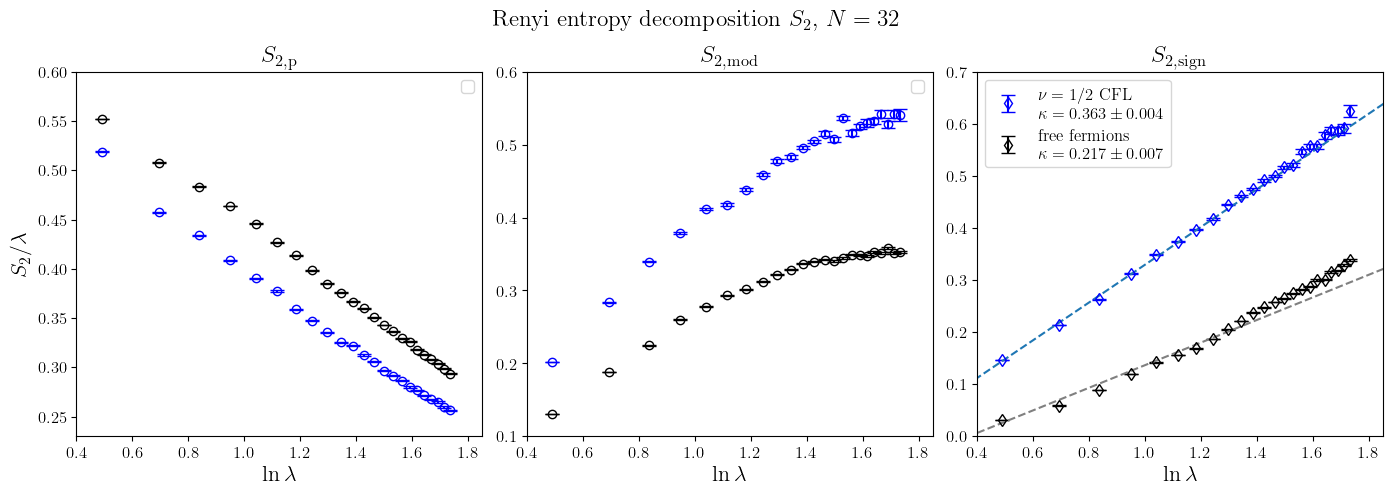

In [4]:
Ne = 32
plt.errorbar(np.log(x_cfl), (entropy_cfl[:,6]/x_cfl), entropy_cfl[:,7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.3f} \pm {np.sqrt(pcov_cfl[0,0]):.3f}$')
plt.errorbar(np.log(x_ff), (entropy_ff[:,6]/x_ff), entropy_ff[:,7], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$')
plt.plot(x_fit, y_fit_ff, '--', c='gray')
plt.plot(x_fit, y_fit_cfl, '--', c='gray')
plt.legend()
plt.ylabel('$S_2/\\lambda$')
plt.xlabel('$\ln \\lambda$')
plt.xlim(0.4,1.85)
plt.ylim(0.5,1.55)
plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')
#plt.savefig('s2 n=32.png', dpi=450) 


fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle(f'Renyi entropy decomposition $S_2$'+f', $N={Ne}$ ')


ax[0].errorbar(np.log(x_cfl), (entropy_cfl[:,0]/x_cfl), entropy_cfl[:,1], marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_p_cfl[0]:.3f} \pm {np.sqrt(pcov_p_cfl[0,0]):.3f}$')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (entropy_ff[:,0]/x_ff), entropy_ff[:,1], marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'free fermions \n $\\kappa = {popt_p_ff[0]:.3f} \pm {np.sqrt(pcov_p_ff[0,0]):.3f}$')
#ax[0].plot(x_fit, y_fit_p_ff, '--', c='black')
ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
ax[0].set_xlim(0.4,1.85)
ax[0].set_ylim(0.23,0.6)
ax[0].set_title('$S_{2, \mathrm{p}}$')


ax[1].errorbar(np.log(x_cfl), (entropy_cfl[:,2]/x_cfl), entropy_cfl[:,3], marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_mod_cfl[0]:.3f} \pm {np.sqrt(pcov_mod_cfl[0,0]):.3f}$')
ax[1].errorbar(np.log(x_ff), (entropy_ff[:,2]/x_ff), entropy_ff[:,3], marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'free fermions \n $\\kappa = {popt_mod_ff[0]:.3f} \pm {np.sqrt(pcov_mod_ff[0,0]):.3f}$')
#ax[1].plot(x_fit, y_fit_mod_cfl, '--', c='tab:blue')
#ax[1].plot(x_fit, y_fit_mod_ff, '--', c='black')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')
ax[1].set_xlim(0.4,1.85)
ax[1].set_ylim(0.1,0.6)

ax[2].errorbar(np.log(x_cfl), (entropy_cfl[:,4]/x_cfl), entropy_cfl[:,5], marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (entropy_ff[:,4]/x_ff), entropy_ff[:,5], marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.4,1.85)
ax[2].set_ylim(0.,0.7)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

#plt.savefig('s2 decomposition n=32.png', dpi=450) 

## N = 37

### comparison across fillings

In [15]:
x_cfl2, entropy_cfl2 = LoadEntropy(37, 74, 10e6, 1e5, 1j, 0.048, 'circle', 'cfl')
x_ff, entropy_ff = LoadEntropy(37, 74, 15e6, 1e5, 1j, 0.051, 'circle', 'free_fermions')

popt_cfl2, pcov_cfl2 = np.polyfit(np.log(x_cfl2), entropy_cfl2[:,6]/x_cfl2, deg=1, cov=True, w=1/entropy_cfl2[:,7])
popt_sign_cfl2, pcov_sign_cfl2 = np.polyfit(np.log(x_cfl2), entropy_cfl2[:,4]/x_cfl2, deg=1, cov=True, w=1/entropy_cfl2[:,5])

x_fit = np.linspace(0,5,2)
y_fit_cfl2 = x_fit*popt_cfl2[0] + popt_cfl2[1]
y_fit_sign_cfl2 = x_fit*popt_sign_cfl2[0] + popt_sign_cfl2[1]

popt_ff, pcov_ff = np.polyfit(np.log(x_ff), entropy_ff[:,6]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,7])
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), entropy_ff[:,4]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,5])

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

In [16]:
x_cfl22, entropy_cfl22 = LoadEntropy(37, 148, 5e6, 1e5, 1j, 0.032, 'circle', 'cfl22')

popt_cfl22, pcov_cfl22 = np.polyfit(np.log(x_cfl22), entropy_cfl22[:,6]/x_cfl22, deg=1, cov=True, w=1/entropy_cfl22[:,7])
popt_sign_cfl22, pcov_sign_cfl22 = np.polyfit(np.log(x_cfl22), entropy_cfl22[:,4]/x_cfl22, deg=1, cov=True, w=1/entropy_cfl22[:,5])

x_fit = np.linspace(0,5,2)
y_fit_cfl22 = x_fit*popt_cfl22[0] + popt_cfl22[1]
y_fit_sign_cfl22 = x_fit*popt_sign_cfl22[0] + popt_sign_cfl22[1]

In [17]:
x_cfl40, entropy_cfl40 = LoadEntropy(37, 148, 5e6, 1e5, 1j, 0.032, 'circle', 'cfl40')

popt_cfl40, pcov_cfl40 = np.polyfit(np.log(x_cfl40), entropy_cfl40[:,6]/x_cfl40, deg=1, cov=True, w=1/entropy_cfl40[:,7])
popt_sign_cfl40, pcov_sign_cfl40 = np.polyfit(np.log(x_cfl40), entropy_cfl40[:,4]/x_cfl40, deg=1, cov=True, w=1/entropy_cfl40[:,5])

x_fit = np.linspace(0,5,2)
y_fit_cfl40 = x_fit*popt_cfl40[0] + popt_cfl40[1]
y_fit_sign_cfl40 = x_fit*popt_sign_cfl40[0] + popt_sign_cfl40[1]

In [18]:
x_cfl3, entropy_cfl3 = LoadEntropy(37, 111, 5e6, 1e5, 1j, 0.038, 'circle', 'cfl3')

popt_cfl3, pcov_cfl3 = np.polyfit(np.log(x_cfl3), entropy_cfl3[:,6]/x_cfl3, deg=1, cov=True, w=1/entropy_cfl3[:,7])
popt_sign_cfl3, pcov_sign_cfl3 = np.polyfit(np.log(x_cfl3), entropy_cfl3[:,4]/x_cfl3, deg=1, cov=True, w=1/entropy_cfl3[:,5])

x_fit = np.linspace(0,5,2)
y_fit_cfl3 = x_fit*popt_cfl3[0] + popt_cfl3[1]
y_fit_sign_cfl3 = x_fit*popt_sign_cfl3[0] + popt_sign_cfl3[1]

x_cfl1, entropy_cfl1 = LoadEntropy(37, 37, 10e6, 1e5, 1j, 0.072, 'circle', 'cfl1')

popt_cfl1, pcov_cfl1 = np.polyfit(np.log(x_cfl1), entropy_cfl1[:,6]/x_cfl1, deg=1, cov=True, w=1/entropy_cfl1[:,7])
popt_sign_cfl1, pcov_sign_cfl1 = np.polyfit(np.log(x_cfl1), entropy_cfl1[:,4]/x_cfl1, deg=1, cov=True, w=1/entropy_cfl1[:,5])

x_fit = np.linspace(0,5,2)
y_fit_cfl1 = x_fit*popt_cfl1[0] + popt_cfl1[1]
y_fit_sign_cfl1 = x_fit*popt_sign_cfl1[0] + popt_sign_cfl1[1]

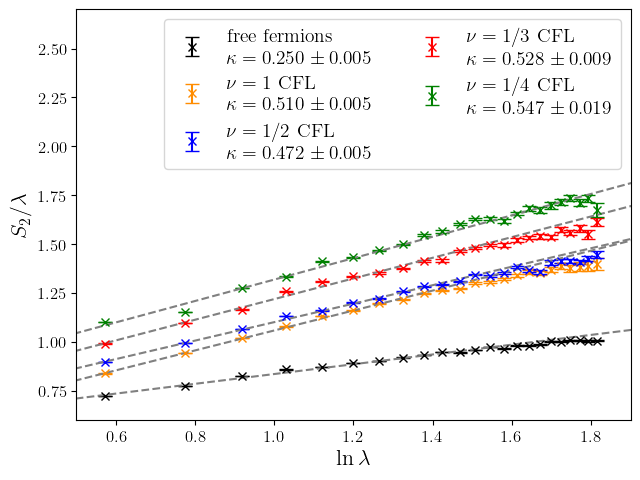

In [59]:
Ne = 37
update_mpl_param(16,14,12,12)

plt.errorbar(np.log(x_ff), (entropy_ff[:,6]/x_ff), entropy_ff[:,7], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$')

plt.errorbar(np.log(x_cfl1), (entropy_cfl1[:,6]/x_cfl1), entropy_cfl1[:,7], marker='x',
             color='darkorange', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
            label=f'$\\nu = 1$ CFL \n $\\kappa = {popt_cfl1[0]:.3f} \pm {np.sqrt(pcov_cfl1[0,0]):.3f}$')
plt.errorbar(np.log(x_cfl2), (entropy_cfl2[:,6]/x_cfl2), entropy_cfl2[:,7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl2[0]:.3f} \pm {np.sqrt(pcov_cfl2[0,0]):.3f}$')
plt.errorbar(np.log(x_cfl3), (entropy_cfl3[:,6]/x_cfl3), entropy_cfl3[:,7], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/3$ CFL \n $\\kappa = {popt_cfl3[0]:.3f} \pm {np.sqrt(pcov_cfl3[0,0]):.3f}$')
plt.plot(x_fit, y_fit_ff, '--', c='gray')
plt.plot(x_fit, y_fit_cfl2, '--', c='gray')

plt.errorbar(np.log(x_cfl22), (entropy_cfl22[:,6]/x_cfl22), entropy_cfl22[:,7], marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/4$ CFL \n $\\kappa = {popt_cfl22[0]:.3f} \pm {np.sqrt(pcov_cfl22[0,0]):.3f}$')

#plt.errorbar(np.log(x_ff22), (S_ff22/x_ff22), err_ff22, marker='x',
#             color='brown', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'free fermions \n $\\kappa = {popt_ff22[0]:.3f} \pm {np.sqrt(pcov_ff22[0,0]):.3f}$')

#plt.plot(x_fit, y_fit_ff22, '--', c='gray')
plt.plot(x_fit, y_fit_cfl22, '--', c='gray')
plt.plot(x_fit, y_fit_cfl3, '--', c='gray')
plt.plot(x_fit, y_fit_cfl1, '--', c='gray')

plt.legend(ncol=2)
plt.ylabel('$S_{2}/\\lambda$')
plt.xlabel('$\ln \\lambda$')
plt.xlim(0.5,1.9)
plt.ylim(0.6,2.7)
#plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')
plt.tight_layout(pad=0.5)
plt.savefig(f'entropy total all fillings.pdf')  

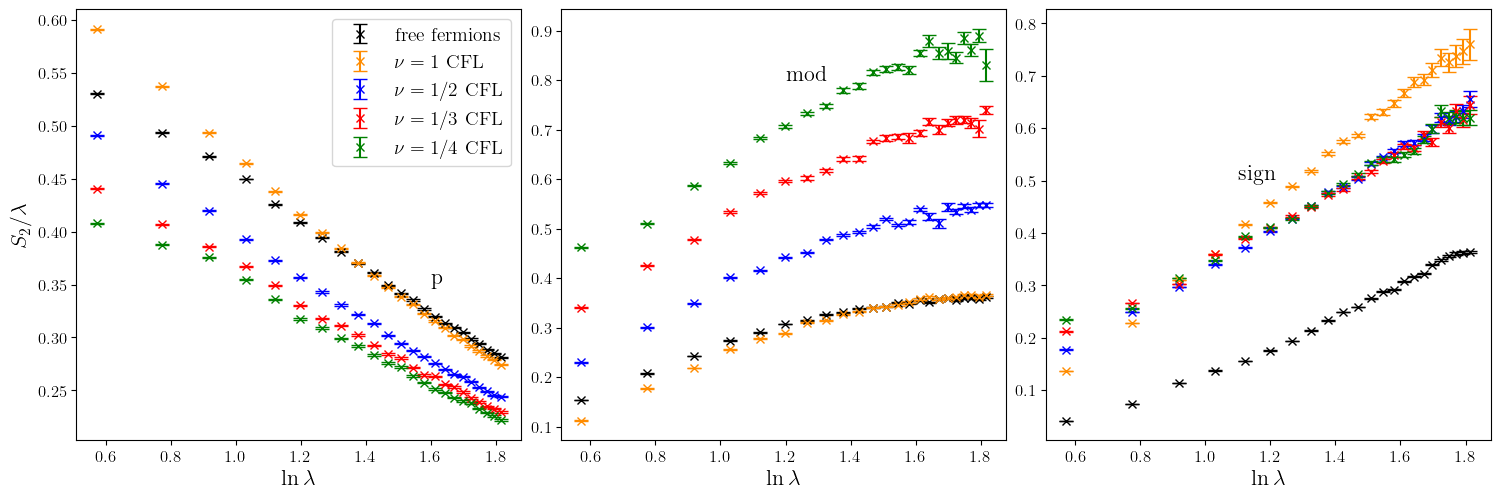

In [60]:
update_mpl_param(16,14,12,12)
fig, ax = plt.subplots(1,3, figsize=(15,5))
#fig.suptitle(f'Renyi entropy decomposition $S_2$, $N={Ne}$ ')


ax[0].errorbar(np.log(x_ff), (entropy_ff[:,0]/x_ff), entropy_ff[:,1], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='free fermions')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x_cfl1), (entropy_cfl1[:,0]/x_cfl1), entropy_cfl1[:,1], marker='x',
             color='darkorange', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='$\\nu=1$ CFL')
ax[0].errorbar(np.log(x_cfl2), (entropy_cfl2[:,0]/x_cfl2), entropy_cfl2[:,1], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='$\\nu=1/2$ CFL')
ax[0].errorbar(np.log(x_cfl3), (entropy_cfl3[:,0]/x_cfl3), entropy_cfl3[:,1], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='$\\nu=1/3$ CFL')
ax[0].errorbar(np.log(x_cfl22), (entropy_cfl22[:,0]/x_cfl22), entropy_cfl22[:,1], marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='$\\nu=1/4$ CFL')

ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
ax[0].text(1.6,0.35,'p', fontsize=16)
#ax[0].set_xlim(0.5,1.85)
#ax[0].set_ylim(0.2,0.6)
#ax[0].set_title('$S_{2, \mathrm{p}}$')


ax[1].errorbar(np.log(x_ff), (entropy_ff[:,2]/x_ff), entropy_ff[:,3], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[1].errorbar(np.log(x_cfl1), (entropy_cfl1[:,2]/x_cfl1), entropy_cfl1[:,3], marker='x',
             color='darkorange', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
ax[1].errorbar(np.log(x_cfl2), (entropy_cfl2[:,2]/x_cfl2), entropy_cfl2[:,3], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
ax[1].errorbar(np.log(x_cfl3), (entropy_cfl3[:,2]/x_cfl3), entropy_cfl3[:,3], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
ax[1].errorbar(np.log(x_cfl22), (entropy_cfl22[:,2]/x_cfl22), entropy_cfl22[:,3], marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

#ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].text(1.2,0.8,'mod', fontsize=16)
#ax[1].set_title('$S_{2, \mathrm{mod}}$')
#ax[1].set_xlim(0.5,1.85)
#ax[1].set_ylim(0.1,1)


ax[2].errorbar(np.log(x_ff), (entropy_ff[:,4]/x_ff), entropy_ff[:,5], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_cfl1), (entropy_cfl1[:,4]/x_cfl1), entropy_cfl1[:,5], marker='x',
             color='darkorange', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
ax[2].errorbar(np.log(x_cfl2), (entropy_cfl2[:,4]/x_cfl2), entropy_cfl2[:,5], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
ax[2].errorbar(np.log(x_cfl3), (entropy_cfl3[:,4]/x_cfl3), entropy_cfl3[:,5], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
ax[2].errorbar(np.log(x_cfl22), (entropy_cfl22[:,4]/x_cfl22), entropy_cfl22[:,5], marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

#ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].text(1.1,0.5,'sign', fontsize=16)
#ax[2].set_xlim(0.5,1.85)
#ax[2].set_ylim(0.,0.7)
#ax[2].set_title('$S_{2, \mathrm{sign}}$')
plt.tight_layout(pad=0.5)

plt.savefig(f'entropy decomposition all fillings.pdf')  

### v = 4 for different JK coefficients

In [3]:
Ne = 37

x_cfl22, entropy_cfl22 = LoadEntropy(37, 148, 5e6, 1e5, 1j, 0.032, 'circle', 'cfl22')

popt_cfl22, pcov_cfl22 = np.polyfit(np.log(x_cfl22), entropy_cfl22[:,6]/x_cfl22, deg=1, cov=True, w=1/entropy_cfl22[:,7])
popt_sign_cfl22, pcov_sign_cfl22 = np.polyfit(np.log(x_cfl22), entropy_cfl22[:,4]/x_cfl22, deg=1, cov=True, w=1/entropy_cfl22[:,5])

x_fit = np.linspace(0.5, 1.9,2)
y_fit_cfl22 = x_fit*popt_cfl22[0] + popt_cfl22[1]
y_fit_sign_cfl22 = x_fit*popt_sign_cfl22[0] + popt_sign_cfl22[1]

In [4]:
x_cfl40, entropy_cfl40 = LoadEntropy(37, 148, 5e6, 1e5, 1j, 0.032, 'circle', 'cfl40')

popt_cfl40, pcov_cfl40 = np.polyfit(np.log(x_cfl40), entropy_cfl40[:,6]/x_cfl40, deg=1, cov=True, w=1/entropy_cfl40[:,7])
popt_sign_cfl40, pcov_sign_cfl40 = np.polyfit(np.log(x_cfl40), entropy_cfl40[:,4]/x_cfl40, deg=1, cov=True, w=1/entropy_cfl40[:,5])

x_fit = np.linspace(0.5, 1.9,2)
y_fit_cfl40 = x_fit*popt_cfl40[0] + popt_cfl40[1]
y_fit_sign_cfl40 = x_fit*popt_sign_cfl40[0] + popt_sign_cfl40[1]

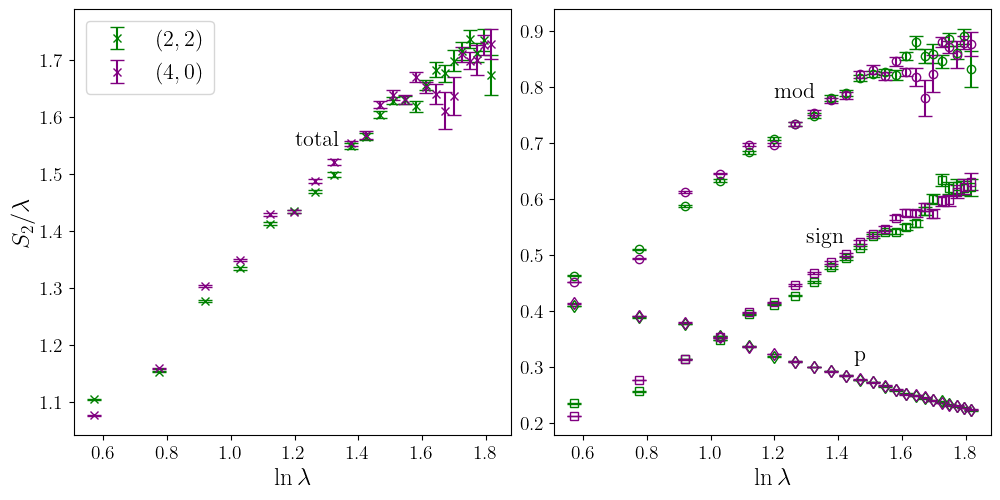

In [14]:
Ne = 37

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].errorbar(np.log(x_cfl22), (entropy_cfl22[:,6]/x_cfl22), entropy_cfl22[:,7], marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='$(2,2)$')
ax[0].errorbar(np.log(x_cfl40), (entropy_cfl40[:,6]/x_cfl40), entropy_cfl40[:,7], marker='x',
             color='purple', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='$(4,0)$')
ax[0].text(1.2, 1.55, "total", fontsize=16)
#plt.errorbar(np.log(x_ff22), (S_ff22/x_ff22), err_ff22, marker='x',
#             color='brown', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'free fermions \n $\\kappa = {popt_ff22[0]:.3f} \pm {np.sqrt(pcov_ff22[0,0]):.3f}$')

#ax[0].plot(x_fit, y_fit_cfl40, '--', c='gray')
#ax[0].plot(x_fit, y_fit_cfl22, '--', c='gray')

ax[0].legend()
ax[0].set_ylabel('$S_{2}/\\lambda$')
ax[0].set_xlabel('$\ln \\lambda$')
#ax[0].set_xlim(0.5,1.85)
#ax[0].set_ylim(0.5,2)
#ax[0].set_title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')


ax[1].errorbar(np.log(x_cfl22), (entropy_cfl22[:,0]/x_cfl22), entropy_cfl22[:,1], marker='d',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label='$\mathrm{p}, (2,2)$')
ax[1].errorbar(np.log(x_cfl40), (entropy_cfl40[:,0]/x_cfl40), entropy_cfl40[:,1], marker='d',
             color='purple', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             )#label='$\mathrm{p}, (4,0)$')

ax[1].errorbar(np.log(x_cfl22), (entropy_cfl22[:,2]/x_cfl22), entropy_cfl22[:,3], marker='o',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             )#label='$\mathrm{mod}, (2,2)$')
ax[1].errorbar(np.log(x_cfl40), (entropy_cfl40[:,2]/x_cfl40), entropy_cfl40[:,3], marker='o',
             color='purple', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             )#label='$\mathrm{mod}, (4,0)$')

ax[1].errorbar(np.log(x_cfl22), (entropy_cfl22[:,4]/x_cfl22), entropy_cfl22[:,5], marker='s',
             color='green', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             )#label='$\mathrm{sign}, (2,2)$')
ax[1].errorbar(np.log(x_cfl40), (entropy_cfl40[:,4]/x_cfl40), entropy_cfl40[:,5], marker='s',
             color='purple', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             )#label='$\mathrm{sign}, (4,0)$')

ax[1].text(1.45, 0.31, "p", fontsize=16)
ax[1].text(1.3, 0.52, "sign", fontsize=16)
ax[1].text(1.2, 0.78, "mod", fontsize=16)

ax[1].set_xlabel('$\ln \\lambda$')
#ax[1].legend()

fig.tight_layout(pad=0.5)
plt.savefig(f'v=4 comparison n={Ne}.pdf') 

## N = 69

In [63]:
Ne = 69
M0 = int(1e5)

M_cfl = int(10e6)
M_ff_p = int(1e7)
M_ff_mod = int(5e7)

nbr_pts = -1

p_ff = np.loadtxt(f"results/dense_free_fermions_p_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.038_circles.dat")
mod_ff = np.loadtxt(f"results/dense_free_fermions_mod_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.038_circles.dat")
sign_ff = np.loadtxt(f"results/dense_free_fermions_sign_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.038_circles.dat")
p_ff_means = p_ff[1:nbr_pts,1]
p_ff_vars = p_ff[1:nbr_pts,2]
mod_ff_means = mod_ff[1:nbr_pts,1]
mod_ff_vars = mod_ff[1:nbr_pts,2]
sign_ff_means = sign_ff[1:nbr_pts,1]
sign_ff_vars = sign_ff[1:nbr_pts,2]

boundaries_ff = p_ff[1:nbr_pts,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [64]:
S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M_ff_p-M0)

S_mod_ff = -np.log(mod_ff_means)
err_mod_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M_ff_mod-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M_ff_mod-M0)

S_ff = S_p_ff + S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_p_ff**2 + err_mod_ff**2 + err_sign_ff**2)

In [65]:
popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_p_ff, pcov_p_ff = np.polyfit(np.log(x_ff), S_p_ff/x_ff, deg=1, cov=True, w=1/err_p_ff)
popt_mod_ff, pcov_mod_ff = np.polyfit(np.log(x_ff), S_mod_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_p_ff = x_fit*popt_p_ff[0] + popt_p_ff[1]
y_fit_mod_ff = x_fit*popt_mod_ff[0] + popt_mod_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

In [79]:
from utilities import GetEntropyFreeFermionsED

x, S_ED = GetEntropyFreeFermionsED(np.sqrt(20), 2, 'circle', 
    np.exp(np.arange(-2.8, -1.1, 0.01)))

x_37, S_37_ED = GetEntropyFreeFermionsED(np.sqrt(10), 2, 'circle', 
    np.exp(np.arange(-3, -0.80, 0.005)))
x_69, S_69_ED = GetEntropyFreeFermionsED(np.sqrt(20), 2, 'circle', 
    np.exp(np.arange(-3.35, -0.85, 0.005)))
#x_185, S_185_ED = GetEntropyFreeFermionsED(np.sqrt(58), 2, 'circle', 
#    np.exp(np.arange(-3.9, -0.85, 0.01)))
#x_373, S_373_ED = GetEntropyFreeFermionsED(np.sqrt(117), 2, 'circle', 
#    np.exp(np.arange(4, -1.1, 0.02)))
#x_505, S_505_ED = GetEntropyFreeFermionsED(np.sqrt(160), 2, 'circle', 
#    np.exp(np.arange(-4.3, -1.1, 0.05)))
#x_1101, S_1101_ED = GetEntropyFreeFermionsED(np.sqrt(350), 2, 'circle', 
#    np.exp(np.arange(-4.85, -0.75, 0.02)))
#print(f"{Ne} electrons: 10% at {np.log(0.252*np.sqrt(2*np.pi/Ns)*kF*Lx)}")

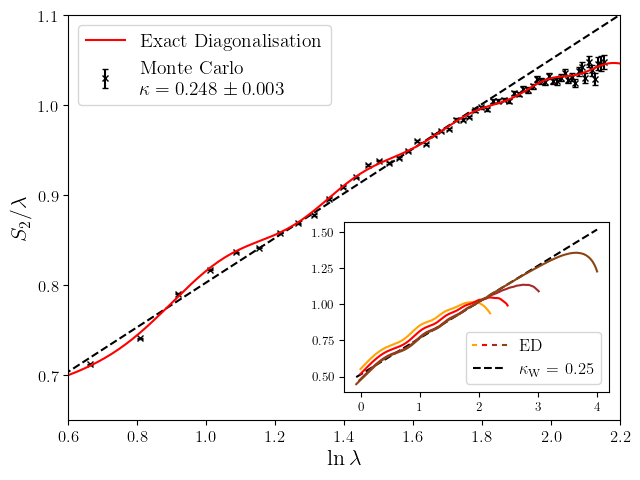

In [81]:
update_mpl_param(16,14,12,12)

fig, ax = plt.subplots(1,1)
#plt.errorbar(np.log(x_cfl), (S_cfl/x_cfl), err_cfl, marker='x',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.3f} \pm {np.sqrt(pcov_cfl[0,0]):.3f}$')
ax.errorbar(np.log(x_ff), (S_ff/x_ff), err_ff, marker='x',
             color='black', markersize=5, capsize=2.5, linestyle='none', markerfacecolor='none',
             label=f'Monte Carlo \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$', zorder=1)
ax.plot(x_fit, y_fit_ff, '--', c='k', zorder=0)
ax.plot(np.log(x), S_ED/x, zorder=2, c='r', label='Exact Diagonalisation')
#plt.plot(x_fit, y_fit_cfl, '--', c='gray')
ax.legend()
ax.set_ylabel('$S_{2}/\\lambda$')
ax.set_xlabel('$\ln \\lambda$')
ax.set_xlim(0.6,2.2)
ax.set_ylim(0.65,1.1)
#plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')
#plt.text(0.7, 0.97, "Free fermions, $N=69$")


""""""
update_mpl_param(12,12,9,9)
axin = ax.inset_axes([0.5, 0.07, 0.48, 0.42])
#axin = inset_axes(ax, width="43%", height="45%", loc="lower right", bbox_to_anchor=(0.1,0,1,1), bbox_transform=ax.transAxes)
p1, = axin.plot(np.log(x_37), S_37_ED/x_37, label="$N=37$", c='orange')
p2, = axin.plot(np.log(x_69), S_69_ED/x_69, label="$N=69$", c='red')
p3, = axin.plot(np.log(x_185), S_185_ED/x_185, label="$N=185$", c='brown')
#axin.plot(np.log(x_505), S_505_ED/x_505, label="$N=505$")
p4, = axin.plot(np.log(x_1101), S_1101_ED/x_1101, label="$N=1101$", c='saddlebrown')
p5, = axin.plot(np.log(x_1101), np.log(x_1101)*0.25 + 0.517, '--', c='k', zorder=0)
#axin.text(x=3, y=1.42, s="$\\kappa_{\mathrm{W}}$", fontsize=12)
#axin.set_xlabel("$\ln \\lambda$")
#axin.set_ylabel("$S_{2}/\\lambda$")
#axin.set_xticklabels([])
#axin.set_yticklabels([])
#axin.set_xticks([])
#axin.set_yticks([])
axin.legend([(p1,p2,p3,p4),p5], ["ED", "$\\kappa_{\mathrm{W}}$ = 0.25"], handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower right')
update_mpl_param(16,14,12,12)

fig.tight_layout(pad=0.5)
fig.savefig('free_fermions_n=69.pdf')  


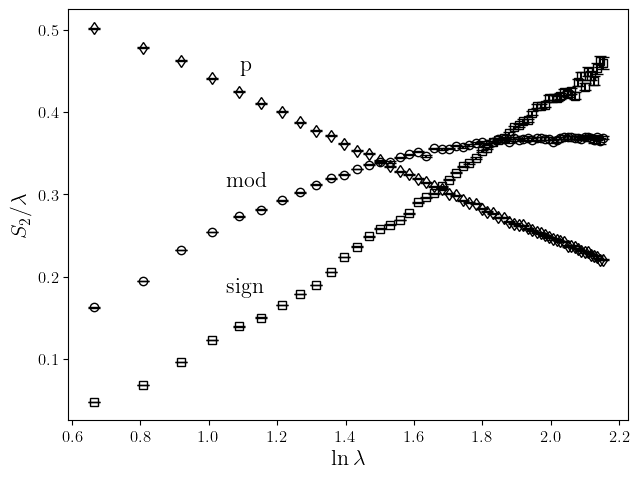

In [114]:
update_mpl_param(16,14,12,12)

#ax[0].errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='o',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_p_cfl[0]:.3f} \pm {np.sqrt(pcov_p_cfl[0,0]):.3f}$')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
plt.errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='d',
             color='black', markersize=6, capsize=4, linestyle='none', markerfacecolor='none',
             label='$S_{2, \mathrm{p}}$')#free fermions \n $\\kappa = {popt_p_ff[0]:.3f} \pm {np.sqrt(pcov_p_ff[0,0]):.3f}$')
plt.errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=4, linestyle='none', markerfacecolor='none',
             label='$S_{2,\mathrm{mod}}$')
plt.errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='s',
             color='black', markersize=6, capsize=4, linestyle='none', markerfacecolor='none',
             label='$S_{2,\mathrm{sign}}$')#free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
 #ax[0].plot(x_fit, y_fit_p_ff, '--', c='black')
#plt.legend()
plt.xlabel('$\ln \\lambda$')
plt.ylabel('$S_{2}/\lambda$')

plt.text(1.09,0.45,'p', fontsize=16)
plt.text(1.05,0.31,'mod', fontsize=16)
plt.text(1.05,0.18,'sign', fontsize=16)

plt.tight_layout(pad=0.5)
plt.savefig('free fermions decomposition n=69.pdf')  

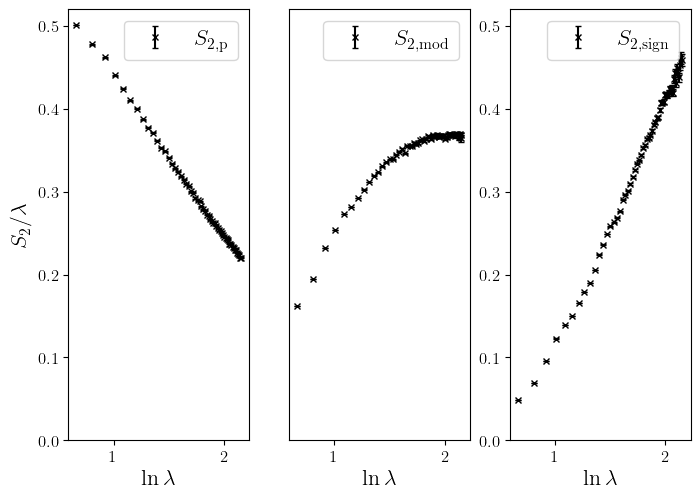

In [97]:
update_mpl_param(16,16,12,12)

fig, ax = plt.subplots(1,3, figsize=(7,5))
#fig.suptitle(f'Renyi entropy decomposition $S_2$, $N={Ne}$ ')


#ax[0].errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='o',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_p_cfl[0]:.3f} \pm {np.sqrt(pcov_p_cfl[0,0]):.3f}$')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='x',
             color='black', markersize=5, capsize=2.5, linestyle='none', markerfacecolor='none',
             label='$S_{2, \mathrm{p}}$')#free fermions \n $\\kappa = {popt_p_ff[0]:.3f} \pm {np.sqrt(pcov_p_ff[0,0]):.3f}$')
#ax[0].plot(x_fit, y_fit_p_ff, '--', c='black')
ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
#ax[0].set_xlim(0.6,2.2)
ax[0].set_ylim(0.,0.52)
#ax[0].set_title('$S_{2, \mathrm{p}}$')


#ax[1].errorbar(np.log(x_cfl), (S_mod_cfl/x_cfl), err_mod_cfl, marker='o',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_mod_cfl[0]:.3f} \pm {np.sqrt(pcov_mod_cfl[0,0]):.3f}$')
ax[1].errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='x',
             color='black', markersize=5, capsize=2.5, linestyle='none', markerfacecolor='none',
             label='$S_{2,\mathrm{mod}}$')
             #label=f'free fermions \n $\\kappa = {popt_mod_ff[0]:.3f} \pm {np.sqrt(pcov_mod_ff[0,0]):.3f}$')
#ax[1].plot(x_fit, y_fit_mod_cfl, '--', c='tab:blue')
#ax[1].plot(x_fit, y_fit_mod_ff, '--', c='black')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_ylim(0.,0.52)
ax[1].set_yticks([])
#ax[1].set_title('$S_{2, \mathrm{mod}}$')
#ax[1].set_xlim(0.6,2.2)
#ax[1].set_ylim(0.15,0.4)

#ax[2].errorbar(np.log(x_cfl), (S_sign_cfl/x_cfl), err_sign_cfl, marker='d',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
#ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='x',
             color='black', markersize=5, capsize=2.5, linestyle='none', markerfacecolor='none',
             label='$S_{2,\mathrm{sign}}$')#free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
#ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_ylim(0.,0.52)
#ax[2].set_xlim(0.6,2.2)
#ax[2].set_ylim(0.0,0.5)
#ax[2].set_title('$S_{2, \mathrm{sign}}$')

fig.tight_layout(pad=0.5)
#fig.savefig('free_fermions_decomposition_n=69.pdf')  